## Introduction:
Airlines are interested in predicting engines failures in advance to enhance operations and reduce flight delays. Observing engine's health and condition through sensors and telemetry data is assumed to facilitate this type of maintenance by predicting Time To Failure (TTF) of in service engine. Consequently, maintenance work could be planned according to TTF predictions instead of/to complement costly time based preventive maintenance.

## Approach:
By exploring aircraft engine’s sensor values over time, machine learning algorithm can learn the relationship between sensor values and changes in sensor values to the historical failures in order to predict failures in the future.

## Data Source
___Training Data:___  The aircraft engine run-to-failure data.

___Test Data:___ The aircraft engine operating data without failure events recorded.

___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.

### Data Columns

•__id__: is the engine ID, ranging from 1 to 100.

•__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (training data only).

•__setting1__ to __setting3__: engine operational settings.

•__s1__ to __s21__: sensors measurements.

## Importing libraries

In [ ]:
%load_ext jupyternotify
# %reload_ext jupyternotify

In [70]:
# Pandas profiling
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix

In [49]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Importing Dataset

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Predictive maintenance 2

07-03-2021  10:40    <DIR>          .
07-03-2021  10:40    <DIR>          ..
07-03-2021  10:36    <DIR>          .ipynb_checkpoints
19-02-2021  17:36         2,228,855 PM_test.txt
19-02-2021  17:36         3,515,356 PM_train.txt
19-02-2021  17:36               429 PM_truth.txt
07-03-2021  10:40             4,072 Predictive Maintanance.ipynb
19-02-2021  03:10            68,459 test.csv
19-02-2021  03:10        13,992,887 train.csv
               6 File(s)     19,810,058 bytes
               3 Dir(s)  167,485,808,640 bytes free


In [5]:
# dataset column names
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7',\
             's8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [12]:
# load training data
data_train = pd.read_csv('PM_train.txt', sep = ' ', header=None)
data_train.shape
data_train.head()

(20631, 28)

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

      10      11       12       13   14     15      16       17       18  \
0  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02  8138.62   
1  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07  8131.49   
2  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03  8133.23   
3  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08  8133.83   
4  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04  8133.80   

       19    20   21    22     23     24       25  26  27  
0  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN

In [15]:
# drop extra space columnn
data_train.drop([26,27], axis=1, inplace=True)

In [16]:
# assign column names
data_train.columns = col_names
data_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02   
1  14.62  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07   
2  14.62  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03   
3  14.62  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08   
4  14.62  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04   

       s14     s15   s16  s17   s18    s19    s20      s21  
0  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  
1  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  
2  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  
3  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  
4  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [19]:
data_train.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [33]:
data_train.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Total 100 engines

In [17]:
data_train.describe()

id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

                 s6            s7            s8            s9           s10  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean      21.609803    553.367711   2388.096652   9065.242941  1.300000e+00   
std        0.001389      0.885092      0.070985     22.082880  4.660829e-13   
min       21.600000    549.850000   2387.900000   9021.730000  1.300000e+00   
25%       21.610000    552.810000   2388.050000   9053.100000  1.300000e+00   
50%       21.610000    553.440000   2388.090000   9060.660000  1.300000e+00   
75%       21.610000    554.010000   2388.140000   9069.420000  1.300000e+00   
max       21.610000    556.060000   2388.560000   9244.590000  1.300000e+00   

                s11           s12           s13           s14           s15  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      47.541168    521.413470   2388.096152   8143.752722      8.442146   
std        0.267087      0.737553      0.071919     19.076176      0.037505   
min       46.850000    518.690000   2387.880000   8099.940000      8.324900   
25%       47.350000    520.960000   2388.040000   8133.245000      8.414900   
50%       47.510000    521.480000   2388.090000   8140.540000      8.438900   
75%       47.700000    521.950000   2388.140000   8148.310000      8.465600   
max       48.530000    523.380000   2388.560000   8293.720000      8.584800   

                s16           s17      s18      s19           s20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

                s21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

There are 100 engines. Each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.

In [20]:
# load training data
data_test = pd.read_csv('PM_test.txt', sep = ' ', header=None)
data_test.shape
data_test.head()

(13096, 28)

0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

      10      11       12       13   14     15      16       17       18  \
0  21.61  553.90  2388.04  9050.17  1.3  47.20  521.72  2388.03  8125.55   
1  21.61  554.85  2388.01  9054.42  1.3  47.50  522.16  2388.06  8139.62   
2  21.61  554.11  2388.05  9056.96  1.3  47.50  521.97  2388.03  8130.10   
3  21.61  554.07  2388.03  9045.29  1.3  47.28  521.38  2388.05  8132.90   
4  21.61  554.16  2388.01  9044.55  1.3  47.31  522.15  2388.03  8129.54   

       19    20   21    22     23     24       25  26  27  
0  8.4052  0.03  392  2388  100.0  38.86  23.3735 NaN NaN  
1  8.3803  0.03  393  2388  100.0  39.02  23.3916 NaN NaN  
2  8.4441  0.03  393  2388  100.0  39.08  23.4166 NaN NaN  
3  8.3917  0.03  391  2388  100.0  39.00  23.3737 NaN NaN  
4  8.4031  0.03  390  2388  100.0  38.99  23.4130 NaN NaN

In [21]:
# drop extra space columnn
data_test.drop([26,27], axis=1, inplace=True)

In [22]:
# assign column names
data_test.columns = col_names
data_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  553.90  2388.04  9050.17  1.3  47.20  521.72  2388.03   
1  14.62  21.61  554.85  2388.01  9054.42  1.3  47.50  522.16  2388.06   
2  14.62  21.61  554.11  2388.05  9056.96  1.3  47.50  521.97  2388.03   
3  14.62  21.61  554.07  2388.03  9045.29  1.3  47.28  521.38  2388.05   
4  14.62  21.61  554.16  2388.01  9044.55  1.3  47.31  522.15  2388.03   

       s14     s15   s16  s17   s18    s19    s20      s21  
0  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735  
1  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916  
2  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166  
3  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737  
4  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130

In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   setting3  13096 non-null  float64
 5   s1        13096 non-null  float64
 6   s2        13096 non-null  float64
 7   s3        13096 non-null  float64
 8   s4        13096 non-null  float64
 9   s5        13096 non-null  float64
 10  s6        13096 non-null  float64
 11  s7        13096 non-null  float64
 12  s8        13096 non-null  float64
 13  s9        13096 non-null  float64
 14  s10       13096 non-null  float64
 15  s11       13096 non-null  float64
 16  s12       13096 non-null  float64
 17  s13       13096 non-null  float64
 18  s14       13096 non-null  float64
 19  s15       13096 non-null  float64
 20  s16       13096 non-null  fl

In [25]:
data_test.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [23]:
data_test.describe()

id         cycle      setting1      setting2  setting3  \
count  13096.000000  13096.000000  13096.000000  13096.000000   13096.0   
mean      51.543907     76.836515     -0.000011      0.000004     100.0   
std       28.289423     53.057749      0.002203      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       28.000000     33.000000     -0.001500     -0.000200     100.0   
50%       52.000000     69.000000      0.000000      0.000000     100.0   
75%       76.000000    113.000000      0.001500      0.000300     100.0   
max      100.000000    303.000000      0.007800      0.000700     100.0   

                 s1            s2            s3            s4            s5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

                 s6            s7            s8            s9           s10  \
count  13096.000000  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean      21.609701    553.757523   2388.070964   9058.407363  1.300000e+00   
std        0.001704      0.681286      0.057442     11.436261  3.157595e-13   
min       21.600000    550.880000   2387.890000   9024.530000  1.300000e+00   
25%       21.610000    553.310000   2388.030000   9051.020000  1.300000e+00   
50%       21.610000    553.800000   2388.070000   9057.320000  1.300000e+00   
75%       21.610000    554.240000   2388.110000   9064.110000  1.300000e+00   
max       21.610000    555.840000   2388.300000   9155.030000  1.300000e+00   

                s11           s12           s13           s14           s15  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean      47.416204    521.747724   2388.071025   8138.947817      8.425844   
std        0.195917      0.559627      0.056934     10.188605      0.029009   
min       46.800000    519.380000   2387.890000   8108.500000      8.332800   
25%       47.270000    521.380000   2388.030000   8132.310000      8.405600   
50%       47.410000    521.780000   2388.070000   8138.390000      8.424900   
75%       47.540000    522.150000   2388.110000   8144.360000      8.444300   
max       48.260000    523.760000   2388.320000   8220.480000      8.541400   

                s16           s17      s18      s19           s20  \
count  1.309600e+04  13096.000000  13096.0  13096.0  13096.000000   
mean   3.000000e-02    392.571625   2388.0    100.0     38.892502   
std    8.823140e-15      1.233577      0.0      0.0      0.141681   
min    3.000000e-02    389.000000   2388.0    100.0     38.310000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.800000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.900000   
75%    3.000000e-02    393.000000   2388.0    100.0     38.990000   
max    3.000000e-02    397.000000   2388.0    100.0     39.410000   

                s21  
count  13096.000000  
mean      23.335743  
std        0.084120  
min       22.935400  
25%       23.281600  
50%       23.339200  
75%       23.393600  
max       23.641900

Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

In [28]:
# Load the truth data - actual 'ttf' for test data
data_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
data_truth.shape
data_truth.head()

(100, 2)

0   1
0  112 NaN
1   98 NaN
2   69 NaN
3   82 NaN
4   91 NaN

In [29]:
# drop extra empty column in the truth data and rename remaining 'ttf'
data_truth.drop([1], axis=1, inplace=True)
data_truth.columns = ['ttf']
data_truth.head()

ttf
0  112
1   98
2   69
3   82
4   91

In [31]:
data_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ttf     100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [32]:
data_truth.isnull().sum()

ttf    0
dtype: int64

In [30]:
data_truth.describe()

ttf
count  100.00000
mean    75.52000
std     41.76497
min      7.00000
25%     32.75000
50%     86.00000
75%    112.25000
max    145.00000

To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression and classification labels for both training and test data.

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.

## Feature Extraction:
Create helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation

In [49]:
def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using 
        fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15',
                   's16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

In [50]:
# add extracted features to training data
df_train_fx = add_features(data_train, 5)
df_train_fx.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02   
1  14.62  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07   
2  14.62  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03   
3  14.62  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08   
4  14.62  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04   

       s14     s15   s16  s17   s18    s19    s20      s21     av1  \
0  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  518.67   
1  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  518.67   
2  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  518.67   
3  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  518.67   
4  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044  518.67   

          av2          av3          av4    av5    av6         av7        av8  \
0  641.820000  1589.700000  1400.600000  14.62  21.61  554.360000  2388.0600   
1  641.985000  1590.760000  1401.870000  14.62  21.61  554.055000  2388.0500   
2  642.106667  1589.836667  1402.646667  14.62  21.61  554.123333  2388.0600   
3  642.167500  1588.075000  1402.452500  14.62  21.61  554.205000  2388.0725   
4  642.208000  1587.030000  1403.206000  14.62  21.61  554.164000  2388.0700   

           av9  av10    av11     av12      av13         av14      av15  av16  \
0  9046.190000   1.3  47.470  521.660  2388.020  8138.620000  8.419500  0.03   
1  9045.130000   1.3  47.480  521.970  2388.045  8135.055000  8.425650  0.03   
2  9047.733333   1.3  47.410  522.120  2388.040  8134.446667  8.423033  0.03   
3  9048.170000   1.3  47.340  522.305  2388.050  8134.292500  8.409325  0.03   
4  9049.566000   1.3  47.328  522.282  2388.048  8134.194000  8.413340  0.03   

         av17    av18   av19       av20       av21  sd1       sd2       sd3  \
0  392.000000  2388.0  100.0  39.060000  23.419000  0.0  0.000000  0.000000   
1  392.000000  2388.0  100.0  39.030000  23.421300  0.0  0.233345  1.499066   
2  391.333333  2388.0  100.0  39.003333  23.395600  0.0  0.267644  1.918654   
3  391.500000  2388.0  100.0  38.972500  23.390175  0.0  0.250117  3.855909   
4  391.800000  2388.0  100.0  38.958000  23.393020  0.0  0.234776  4.075678   

        sd4  sd5  sd6       sd7       sd8       sd9  sd10      sd11      sd12  \
0  0.000000  0.0  0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1  1.796051  0.0  0.0  0.431335  0.014142  1.499066   0.0  0.014142  0.438406   
2  1.850009  0.0  0.0  0.327159  0.020000  4.632023   0.0  0.121655  0.404475   
3  1.559645  0.0  0.0  0.313103  0.029861  3.881555   0.0  0.171659  0.495950   
4  2.159440  0.0  0.0  0.286234  0.026458  4.587366   0.0  0.151063  0.432574   

       sd13      sd14      sd15  sd16      sd17  sd18  sd19      sd20  \
0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0  0.000000   
1  0.035355  5.041671  0.008697   0.0  0.000000   0.0   0.0  0.042426   
2  0.026458  3.717450  0.007640   0.0  1.154701   0.0   0.0  0.055076   
3  0.029439  3.050906  0.028117   0.0  1.000000   0.0   0.0  0.076322   
4  0.025884  2.651326  0.025953   0.0  1.095445   0.0   0.0  0.073621   

       sd21  
0  0.000000  
1  0.003253  
2  0.044573  
3  0.037977  
4  0.033498

In [51]:
# add extracted features to test data
df_test_fx = add_features(data_test, 5)
df_test_fx.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  553.90  2388.04  9050.17  1.3  47.20  521.72  2388.03   
1  14.62  21.61  554.85  2388.01  9054.42  1.3  47.50  522.16  2388.06   
2  14.62  21.61  554.11  2388.05  9056.96  1.3  47.50  521.97  2388.03   
3  14.62  21.61  554.07  2388.03  9045.29  1.3  47.28  521.38  2388.05   
4  14.62  21.61  554.16  2388.01  9044.55  1.3  47.31  522.15  2388.03   

       s14     s15   s16  s17   s18    s19    s20      s21     av1  \
0  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735  518.67   
1  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916  518.67   
2  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166  518.67   
3  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737  518.67   
4  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130  518.67   

          av2          av3          av4    av5    av6         av7  \
0  643.020000  1585.290000  1398.210000  14.62  21.61  553.900000   
1  642.365000  1586.870000  1396.815000  14.62  21.61  554.375000   
2  642.396667  1586.893333  1398.323333  14.62  21.61  554.286667   
3  642.407500  1586.200000  1400.347500  14.62  21.61  554.232500   
4  642.428000  1586.398000  1400.662000  14.62  21.61  554.218000   

           av8       av9  av10    av11      av12       av13         av14  \
0  2388.040000  9050.170   1.3  47.200  521.7200  2388.0300  8125.550000   
1  2388.025000  9052.295   1.3  47.350  521.9400  2388.0450  8132.585000   
2  2388.033333  9053.850   1.3  47.400  521.9500  2388.0400  8131.756667   
3  2388.032500  9051.710   1.3  47.370  521.8075  2388.0425  8132.042500   
4  2388.028000  9050.278   1.3  47.358  521.8760  2388.0400  8131.542000   

       av15  av16        av17    av18   av19       av20      av21  sd1  \
0  8.405200  0.03  392.000000  2388.0  100.0  38.860000  23.37350  0.0   
1  8.392750  0.03  392.500000  2388.0  100.0  38.940000  23.38255  0.0   
2  8.409867  0.03  392.666667  2388.0  100.0  38.986667  23.39390  0.0   
3  8.405325  0.03  392.250000  2388.0  100.0  38.990000  23.38885  0.0   
4  8.404880  0.03  391.800000  2388.0  100.0  38.990000  23.39368  0.0   

        sd2       sd3       sd4  sd5  sd6       sd7       sd8       sd9  sd10  \
0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000   0.0   
1  0.926310  2.234457  1.972828  0.0  0.0  0.671751  0.021213  3.005204   0.0   
2  0.657292  1.580517  2.961627  0.0  0.0  0.499032  0.020817  3.430700   0.0   
3  0.537114  1.894254  4.715558  0.0  0.0  0.421614  0.017078  5.115160   0.0   
4  0.467408  1.699167  4.143902  0.0  0.0  0.366565  0.017889  5.465965   0.0   

       sd11      sd12      sd13      sd14      sd15  sd16      sd17  sd18  \
0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0   
1  0.212132  0.311127  0.021213  9.948992  0.017607   0.0  0.707107   0.0   
2  0.173205  0.220681  0.017321  7.179807  0.032155   0.0  0.577350   0.0   
3  0.153623  0.337182  0.015000  5.890096  0.027781   0.0  0.957427   0.0   
4  0.135720  0.329742  0.014142  5.222300  0.024080   0.0  1.303840   0.0   

   sd19      sd20      sd21  
0   0.0  0.000000  0.000000  
1   0.0  0.113137  0.012799  
2   0.0  0.113725  0.021642  
3   0.0  0.093095  0.020353  
4   0.0  0.080623  0.020672

Create helper function to add the regression and classification labels to the training data.

Regression: Time To Failure TTF (no. of remaining cycle before failure) for each cycle/engine is the number of cycles between that cycle and the last cycle of the same engine.

Binary Classification: if the remaining cycles is less than specific number of cycles (e.g. period = 30), the engine will fail in this period , otherwise the engine is fine.

Multiclass Classification: by segmenting the TTF into cycle bands (e.g. periods: 0-15, 16-30, 30+), we could identify in which period will the engine fail.

In [62]:
def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added     
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in

create helper function to add the regression and classification labels to the test data

In [67]:
def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max()) 
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')
    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]
    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    df_test_in.reset_index(drop=True, inplace=True)
    df_test_in = pd.concat([df_test_in, data_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

In [64]:
# add labels to training data using period of 30 cycles for classification
df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02   
1  14.62  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07   
2  14.62  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03   
3  14.62  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08   
4  14.62  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04   

       s14     s15   s16  s17   s18    s19    s20      s21     av1  \
0  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  518.67   
1  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  518.67   
2  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  518.67   
3  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  518.67   
4  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044  518.67   

          av2          av3          av4    av5    av6         av7        av8  \
0  641.820000  1589.700000  1400.600000  14.62  21.61  554.360000  2388.0600   
1  641.985000  1590.760000  1401.870000  14.62  21.61  554.055000  2388.0500   
2  642.106667  1589.836667  1402.646667  14.62  21.61  554.123333  2388.0600   
3  642.167500  1588.075000  1402.452500  14.62  21.61  554.205000  2388.0725   
4  642.208000  1587.030000  1403.206000  14.62  21.61  554.164000  2388.0700   

           av9  av10    av11     av12      av13         av14      av15  av16  \
0  9046.190000   1.3  47.470  521.660  2388.020  8138.620000  8.419500  0.03   
1  9045.130000   1.3  47.480  521.970  2388.045  8135.055000  8.425650  0.03   
2  9047.733333   1.3  47.410  522.120  2388.040  8134.446667  8.423033  0.03   
3  9048.170000   1.3  47.340  522.305  2388.050  8134.292500  8.409325  0.03   
4  9049.566000   1.3  47.328  522.282  2388.048  8134.194000  8.413340  0.03   

         av17    av18   av19       av20       av21  sd1       sd2       sd3  \
0  392.000000  2388.0  100.0  39.060000  23.419000  0.0  0.000000  0.000000   
1  392.000000  2388.0  100.0  39.030000  23.421300  0.0  0.233345  1.499066   
2  391.333333  2388.0  100.0  39.003333  23.395600  0.0  0.267644  1.918654   
3  391.500000  2388.0  100.0  38.972500  23.390175  0.0  0.250117  3.855909   
4  391.800000  2388.0  100.0  38.958000  23.393020  0.0  0.234776  4.075678   

        sd4  sd5  sd6       sd7       sd8       sd9  sd10      sd11      sd12  \
0  0.000000  0.0  0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1  1.796051  0.0  0.0  0.431335  0.014142  1.499066   0.0  0.014142  0.438406   
2  1.850009  0.0  0.0  0.327159  0.020000  4.632023   0.0  0.121655  0.404475   
3  1.559645  0.0  0.0  0.313103  0.029861  3.881555   0.0  0.171659  0.495950   
4  2.159440  0.0  0.0  0.286234  0.026458  4.587366   0.0  0.151063  0.432574   

       sd13      sd14      sd15  sd16      sd17  sd18  sd19      sd20  \
0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0  0.000000   
1  0.035355  5.041671  0.008697   0.0  0.000000   0.0   0.0  0.042426   
2  0.026458  3.717450  0.007640   0.0  1.154701   0.0   0.0  0.055076   
3  0.029439  3.050906  0.028117   0.0  1.000000   0.0   0.0  0.076322   
4  0.025884  2.651326  0.025953   0.0  1.095445   0.0   0.0  0.073621   

       sd21  ttf  label_bnc  label_mcc  
0  0.000000  191          0          0  
1  0.003253  190          0          0  
2  0.044573  189          0          0  
3  0.037977  188          0          0  
4  0.033498  187          0          0

In [68]:
# add labels to test data using period of 30 cycles for classification
df_test = prepare_test_data(df_test_fx, data_truth, 30)
df_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.42  2388.08  9056.40  1.3  47.23  521.79  2388.06   
1  14.62  21.61  553.52  2388.10  9044.77  1.3  47.67  521.74  2388.09   
2  14.62  21.61  552.59  2388.16  9049.26  1.3  47.88  520.83  2388.14   
3  14.62  21.61  552.64  2388.13  9051.30  1.3  47.65  521.88  2388.11   
4  14.62  21.61  553.29  2388.10  9053.99  1.3  47.46  521.00  2388.15   

       s14     s15   s16  s17   s18    s19    s20      s21     av1      av2  \
0  8130.11  8.4024  0.03  393  2388  100.0  38.81  23.3552  518.67  642.266   
1  8126.90  8.4505  0.03  391  2388  100.0  38.81  23.2618  518.67  642.672   
2  8131.46  8.4119  0.03  395  2388  100.0  38.93  23.2740  518.67  642.874   
3  8133.64  8.4634  0.03  395  2388  100.0  38.58  23.2581  518.67  642.786   
4  8125.74  8.4362  0.03  394  2388  100.0  38.75  23.4117  518.67  642.702   

        av3       av4    av5    av6      av7       av8       av9  av10  \
0  1586.998  1399.918  14.62  21.61  554.116  2388.082  9050.324   1.3   
1  1588.342  1406.778  14.62  21.61  553.748  2388.108  9047.032   1.3   
2  1592.640  1413.350  14.62  21.61  552.702  2388.166  9047.406   1.3   
3  1591.918  1410.736  14.62  21.61  553.444  2388.116  9054.800   1.3   
4  1591.568  1411.796  14.62  21.61  553.158  2388.122  9053.330   1.3   

     av11     av12      av13      av14     av15  av16   av17    av18   av19  \
0  47.288  521.924  2388.064  8132.032  8.42620  0.03  392.0  2388.0  100.0   
1  47.506  521.596  2388.102  8127.672  8.44226  0.03  392.2  2388.0  100.0   
2  47.706  520.722  2388.174  8129.666  8.45868  0.03  394.2  2388.0  100.0   
3  47.642  521.434  2388.114  8134.328  8.45182  0.03  393.6  2388.0  100.0   
4  47.536  521.062  2388.134  8128.798  8.43662  0.03  393.4  2388.0  100.0   

     av20      av21  sd1       sd2       sd3       sd4  sd5  sd6       sd7  \
0  38.924  23.37350  0.0  0.393865  4.683863  1.362689  0.0  0.0  0.338275   
1  38.902  23.27434  0.0  0.167839  1.559670  4.535578  0.0  0.0  0.357729   
2  38.686  23.24412  0.0  0.287367  4.205152  3.357976  0.0  0.0  0.292609   
3  38.758  23.25156  0.0  0.106442  2.818611  5.282105  0.0  0.0  0.590999   
4  38.810  23.29114  0.0  0.259557  1.496620  5.309739  0.0  0.0  0.454170   

        sd8       sd9  sd10      sd11      sd12      sd13      sd14      sd15  \
0  0.008367  5.200801   0.0  0.152217  0.261591  0.028810  3.302941  0.021174   
1  0.044385  3.044901   0.0  0.098387  0.450255  0.008367  1.370062  0.011429   
2  0.028810  1.608782   0.0  0.111937  0.418234  0.029665  2.979090  0.030924   
3  0.058138  4.536805   0.0  0.046583  0.363291  0.027019  0.622953  0.021249   
4  0.038987  3.212717   0.0  0.159154  0.260231  0.023022  1.923609  0.009627   

   sd16      sd17  sd18  sd19      sd20      sd21  ttf  label_bnc  label_mcc  
0   0.0  0.707107   0.0   0.0  0.124016  0.025037  112          0          0  
1   0.0  1.095445   0.0   0.0  0.069785  0.027820   98          0          0  
2   0.0  0.836660   0.0   0.0  0.143631  0.018966   69          0          0  
3   0.0  1.341641   0.0   0.0  0.126372  0.021106   82          0          0  
4   0.0  0.547723   0.0   0.0  0.091924  0.101100   91          0          0

Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training and testing data.

Let us save the dataframe for later use in data exploration and modeling phases.

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting1   20631 non-null  float64
 3   setting2   20631 non-null  float64
 4   setting3   20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  float64
 20  s16   

In [69]:
# save the data to csv file for later use

df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)

## Exploratory Data Analysis

In [81]:
# df_train_int = df_train.apply(np.int64)
# prof = ProfileReport(df_train)
# prof.to_file(output_file='train.html')

In [82]:
# df_test_int = df_train.apply(np.int64)
# prof = ProfileReport(df_test)
# prof.to_file(output_file='test.html')

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02   
1  14.62  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07   
2  14.62  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03   
3  14.62  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08   
4  14.62  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04   

       s14     s15   s16  s17   s18    s19    s20      s21     av1  \
0  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  518.67   
1  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  518.67   
2  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  518.67   
3  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  518.67   
4  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044  518.67   

          av2          av3          av4    av5    av6         av7        av8  \
0  641.820000  1589.700000  1400.600000  14.62  21.61  554.360000  2388.0600   
1  641.985000  1590.760000  1401.870000  14.62  21.61  554.055000  2388.0500   
2  642.106667  1589.836667  1402.646667  14.62  21.61  554.123333  2388.0600   
3  642.167500  1588.075000  1402.452500  14.62  21.61  554.205000  2388.0725   
4  642.208000  1587.030000  1403.206000  14.62  21.61  554.164000  2388.0700   

           av9  av10    av11     av12      av13         av14      av15  av16  \
0  9046.190000   1.3  47.470  521.660  2388.020  8138.620000  8.419500  0.03   
1  9045.130000   1.3  47.480  521.970  2388.045  8135.055000  8.425650  0.03   
2  9047.733333   1.3  47.410  522.120  2388.040  8134.446667  8.423033  0.03   
3  9048.170000   1.3  47.340  522.305  2388.050  8134.292500  8.409325  0.03   
4  9049.566000   1.3  47.328  522.282  2388.048  8134.194000  8.413340  0.03   

         av17    av18   av19       av20       av21  sd1       sd2       sd3  \
0  392.000000  2388.0  100.0  39.060000  23.419000  0.0  0.000000  0.000000   
1  392.000000  2388.0  100.0  39.030000  23.421300  0.0  0.233345  1.499066   
2  391.333333  2388.0  100.0  39.003333  23.395600  0.0  0.267644  1.918654   
3  391.500000  2388.0  100.0  38.972500  23.390175  0.0  0.250117  3.855909   
4  391.800000  2388.0  100.0  38.958000  23.393020  0.0  0.234776  4.075678   

        sd4  sd5  sd6       sd7       sd8       sd9  sd10      sd11      sd12  \
0  0.000000  0.0  0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
1  1.796051  0.0  0.0  0.431335  0.014142  1.499066   0.0  0.014142  0.438406   
2  1.850009  0.0  0.0  0.327159  0.020000  4.632023   0.0  0.121655  0.404475   
3  1.559645  0.0  0.0  0.313103  0.029861  3.881555   0.0  0.171659  0.495950   
4  2.159440  0.0  0.0  0.286234  0.026458  4.587366   0.0  0.151063  0.432574   

       sd13      sd14      sd15  sd16      sd17  sd18  sd19      sd20  \
0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0  0.000000   
1  0.035355  5.041671  0.008697   0.0  0.000000   0.0   0.0  0.042426   
2  0.026458  3.717450  0.007640   0.0  1.154701   0.0   0.0  0.055076   
3  0.029439  3.050906  0.028117   0.0  1.000000   0.0   0.0  0.076322   
4  0.025884  2.651326  0.025953   0.0  1.095445   0.0   0.0  0.073621   

       sd21  ttf  label_bnc  label_mcc  
0  0.000000  191          0          0  
1  0.003253  190          0          0  
2  0.044573  189          0          0  
3  0.037977  188          0          0  
4  0.033498  187          0          0

In [8]:
df_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5     s6      s7       s8       s9  s10    s11     s12      s13  \
0  14.62  21.61  554.42  2388.08  9056.40  1.3  47.23  521.79  2388.06   
1  14.62  21.61  553.52  2388.10  9044.77  1.3  47.67  521.74  2388.09   
2  14.62  21.61  552.59  2388.16  9049.26  1.3  47.88  520.83  2388.14   
3  14.62  21.61  552.64  2388.13  9051.30  1.3  47.65  521.88  2388.11   
4  14.62  21.61  553.29  2388.10  9053.99  1.3  47.46  521.00  2388.15   

       s14     s15   s16  s17   s18    s19    s20      s21     av1      av2  \
0  8130.11  8.4024  0.03  393  2388  100.0  38.81  23.3552  518.67  642.266   
1  8126.90  8.4505  0.03  391  2388  100.0  38.81  23.2618  518.67  642.672   
2  8131.46  8.4119  0.03  395  2388  100.0  38.93  23.2740  518.67  642.874   
3  8133.64  8.4634  0.03  395  2388  100.0  38.58  23.2581  518.67  642.786   
4  8125.74  8.4362  0.03  394  2388  100.0  38.75  23.4117  518.67  642.702   

        av3       av4    av5    av6      av7       av8       av9  av10  \
0  1586.998  1399.918  14.62  21.61  554.116  2388.082  9050.324   1.3   
1  1588.342  1406.778  14.62  21.61  553.748  2388.108  9047.032   1.3   
2  1592.640  1413.350  14.62  21.61  552.702  2388.166  9047.406   1.3   
3  1591.918  1410.736  14.62  21.61  553.444  2388.116  9054.800   1.3   
4  1591.568  1411.796  14.62  21.61  553.158  2388.122  9053.330   1.3   

     av11     av12      av13      av14     av15  av16   av17    av18   av19  \
0  47.288  521.924  2388.064  8132.032  8.42620  0.03  392.0  2388.0  100.0   
1  47.506  521.596  2388.102  8127.672  8.44226  0.03  392.2  2388.0  100.0   
2  47.706  520.722  2388.174  8129.666  8.45868  0.03  394.2  2388.0  100.0   
3  47.642  521.434  2388.114  8134.328  8.45182  0.03  393.6  2388.0  100.0   
4  47.536  521.062  2388.134  8128.798  8.43662  0.03  393.4  2388.0  100.0   

     av20      av21  sd1       sd2       sd3       sd4  sd5  sd6       sd7  \
0  38.924  23.37350  0.0  0.393865  4.683863  1.362689  0.0  0.0  0.338275   
1  38.902  23.27434  0.0  0.167839  1.559670  4.535578  0.0  0.0  0.357729   
2  38.686  23.24412  0.0  0.287367  4.205152  3.357976  0.0  0.0  0.292609   
3  38.758  23.25156  0.0  0.106442  2.818611  5.282105  0.0  0.0  0.590999   
4  38.810  23.29114  0.0  0.259557  1.496620  5.309739  0.0  0.0  0.454170   

        sd8       sd9  sd10      sd11      sd12      sd13      sd14      sd15  \
0  0.008367  5.200801   0.0  0.152217  0.261591  0.028810  3.302941  0.021174   
1  0.044385  3.044901   0.0  0.098387  0.450255  0.008367  1.370062  0.011429   
2  0.028810  1.608782   0.0  0.111937  0.418234  0.029665  2.979090  0.030924   
3  0.058138  4.536805   0.0  0.046583  0.363291  0.027019  0.622953  0.021249   
4  0.038987  3.212717   0.0  0.159154  0.260231  0.023022  1.923609  0.009627   

   sd16      sd17  sd18  sd19      sd20      sd21  ttf  label_bnc  label_mcc  
0   0.0  0.707107   0.0   0.0  0.124016  0.025037  112          0          0  
1   0.0  1.095445   0.0   0.0  0.069785  0.027820   98          0          0  
2   0.0  0.836660   0.0   0.0  0.143631  0.018966   69          0          0  
3   0.0  1.341641   0.0   0.0  0.126372  0.021106   82          0          0  
4   0.0  0.547723   0.0   0.0  0.091924  0.101100   91          0          0

In [9]:
# exclude enging id and cycle number from the input features:

features = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
           's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [57]:
# plot and compare the standard deviation of input features:

df_train[features].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

<AxesSubplot:title={'center':'Features Standard Deviation'}>

In [56]:
# plot and compare the log standard deviation of input features:

df_train[features].std().plot(kind='bar', figsize=(8,6), logy=True, title="Features Standard Deviation (log)")

<AxesSubplot:title={'center':'Features Standard Deviation (log)'}>

<AxesSubplot:>

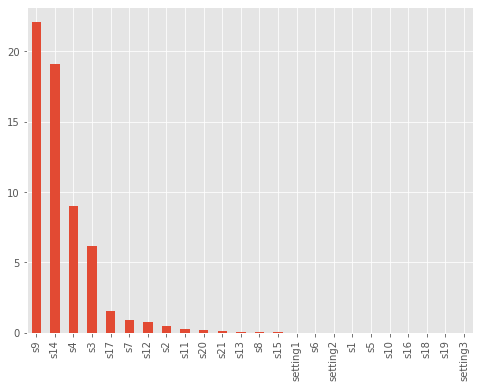

In [55]:
# get ordered list of top variance features:

df_train[features].std().sort_values(ascending=False).plot(kind='bar', figsize=(8,6))

In [54]:
# get ordered list features correlation with regression label ttf

df_train[features].corrwith(df_train.ttf).sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.grid(True)

<AxesSubplot:>

In [33]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection

low_corr_features = ['s16','s5','setting2','setting1','setting3','s1','s10','s18','s19']
df_train[low_corr_features].describe()

s16            s5      setting2      setting1  setting3  \
count  2.063100e+04  2.063100e+04  20631.000000  20631.000000   20631.0   
mean   3.000000e-02  1.462000e+01      0.000002     -0.000009     100.0   
std    1.556432e-14  3.394700e-12      0.000293      0.002187       0.0   
min    3.000000e-02  1.462000e+01     -0.000600     -0.008700     100.0   
25%    3.000000e-02  1.462000e+01     -0.000200     -0.001500     100.0   
50%    3.000000e-02  1.462000e+01      0.000000      0.000000     100.0   
75%    3.000000e-02  1.462000e+01      0.000300      0.001500     100.0   
max    3.000000e-02  1.462000e+01      0.000600      0.008700     100.0   

                 s1           s10      s18      s19  
count  2.063100e+04  2.063100e+04  20631.0  20631.0  
mean   5.186700e+02  1.300000e+00   2388.0    100.0  
std    6.537152e-11  4.660829e-13      0.0      0.0  
min    5.186700e+02  1.300000e+00   2388.0    100.0  
25%    5.186700e+02  1.300000e+00   2388.0    100.0  
50%    5.186700e+02  1.300000e+00   2388.0    100.0  
75%    5.186700e+02  1.300000e+00   2388.0    100.0  
max    5.186700e+02  1.300000e+00   2388.0    100.0

In [34]:
# list of features having high correlation with regression label ttf

high_corr_features = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
df_train[high_corr_features].describe()

s12            s7           s21           s20            s6  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     521.413470    553.367711     23.289705     38.816271     21.609803   
std        0.737553      0.885092      0.108251      0.180746      0.001389   
min      518.690000    549.850000     22.894200     38.140000     21.600000   
25%      520.960000    552.810000     23.221800     38.700000     21.610000   
50%      521.480000    553.440000     23.297900     38.830000     21.610000   
75%      521.950000    554.010000     23.366800     38.950000     21.610000   
max      523.380000    556.060000     23.618400     39.430000     21.610000   

                s14            s9           s13            s8            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    8143.752722   9065.242941   2388.096152   2388.096652   1590.523119   
std       19.076176     22.082880      0.071919      0.070985      6.131150   
min     8099.940000   9021.730000   2387.880000   2387.900000   1571.040000   
25%     8133.245000   9053.100000   2388.040000   2388.050000   1586.260000   
50%     8140.540000   9060.660000   2388.090000   2388.090000   1590.100000   
75%     8148.310000   9069.420000   2388.140000   2388.140000   1594.380000   
max     8293.720000   9244.590000   2388.560000   2388.560000   1616.910000   

                s17            s2           s15            s4           s11  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean     393.210654    642.680934      8.442146   1408.933782     47.541168  
std        1.548763      0.500053      0.037505      9.000605      0.267087  
min      388.000000    641.210000      8.324900   1382.250000     46.850000  
25%      392.000000    642.325000      8.414900   1402.360000     47.350000  
50%      393.000000    642.640000      8.438900   1408.040000     47.510000  
75%      394.000000    643.000000      8.465600   1414.555000     47.700000  
max      400.000000    644.530000      8.584800   1441.490000     48.530000

['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.

Let us disply this correlation in heatmap

In [36]:
# add the regression label 'ttf' to the list of high corr features 

correl_features = high_corr_features + ['ttf']

###### Features with high variability are checked for correlation with other features and regression label (TTF)

In [40]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

plt.figure(figsize=(10, 8))
hm = sns.heatmap(df_train[correl_features].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_features, xticklabels=correl_features)
plt.title('Features Correlation Heatmap')
plt.show()

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Features Correlation Heatmap')

In [41]:
corr_matrix = df_train[correl_features].corr().abs()
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('s12', 's7'),
 ('s12', 's4'),
 ('s12', 's11'),
 ('s7', 's11'),
 ('s14', 's9'),
 ('s13', 's8'),
 ('s4', 's11')]

There is a very high correlation (> 0.8) between some features: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13), (s7, s12)
This may hurt the performance of some ML algorithms.

So, some of the above features will be target for removal in feature selection

In [44]:
#create scatter matrix to disply relatiohships and distribution among features and regression label

# pd.plotting.scatter_matrix(df_train[correl_features], alpha=0.2, figsize=(20, 20), diagonal='kde')
sns.pairplot(df_train[correl_features])

Most of the features have normal distribution which has positve effect on machine learning algorithms.

Most of the features have non-linear relationship with the regression label ttf, so using polynomial models may lead to better results.

Let us create a helper function to ease exploration of each feature invidually:

In [45]:
def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot3. 
                    Range from 1 -100, 0: all engines, >100: all engines.

    Returns: plots
    """
    
    fig = plt.figure(figsize=(10, 8))

    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_train[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_train[s])
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_train.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    
    for i in select_engines:
        df = df_train[['cycle', s]][df_train.id == i]
        sub3.plot(df['cycle'], df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_train['ttf'], df_train[s])

    plt.tight_layout()
    plt.show()

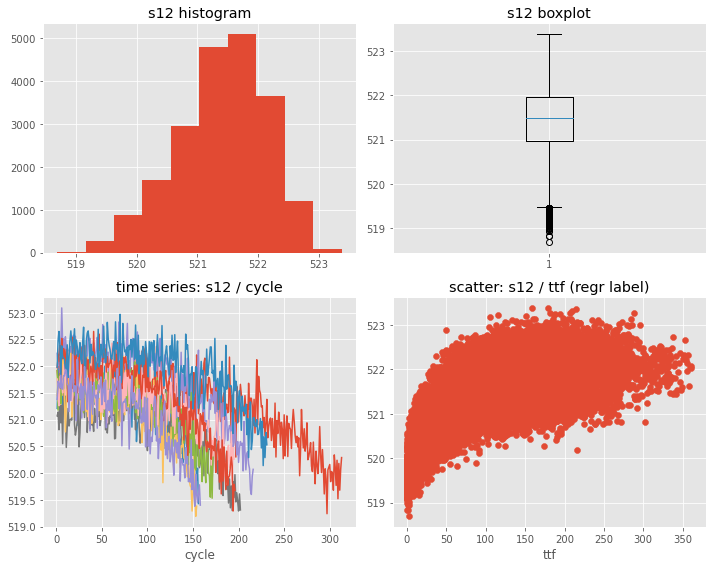

In [53]:
explore_col("s12", 10)

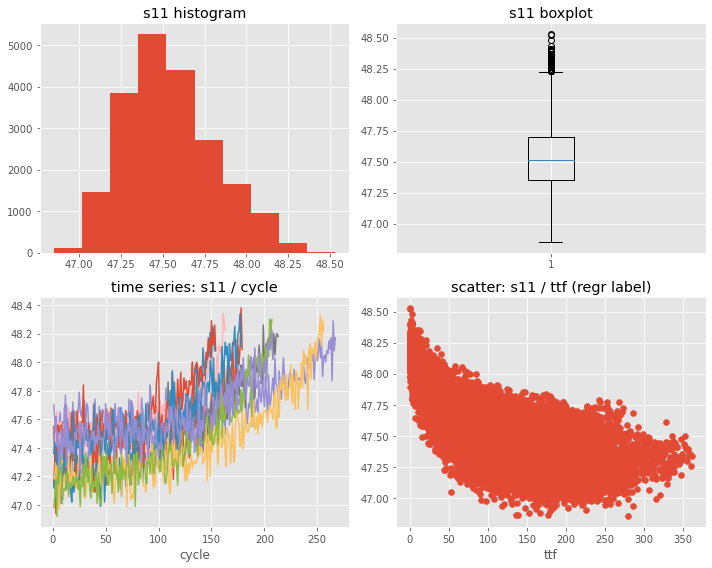

In [52]:
explore_col("s11", 10)

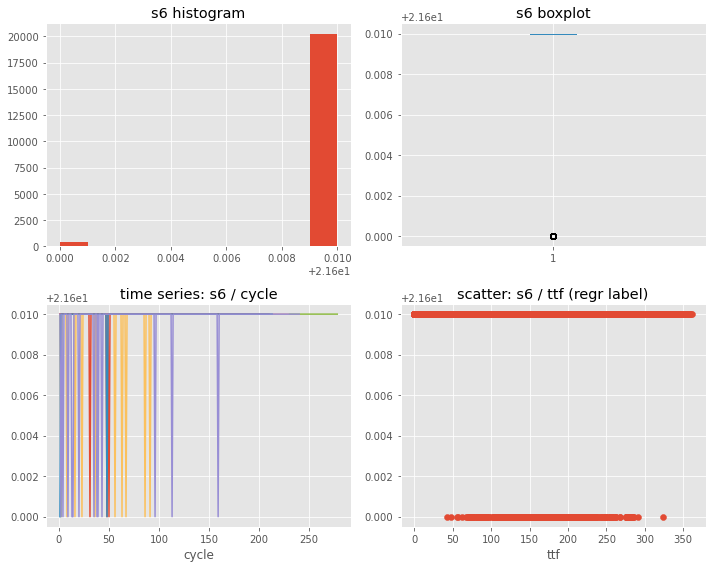

In [51]:
explore_col("s6", 10)

In [50]:
explore_col("s7", 10)

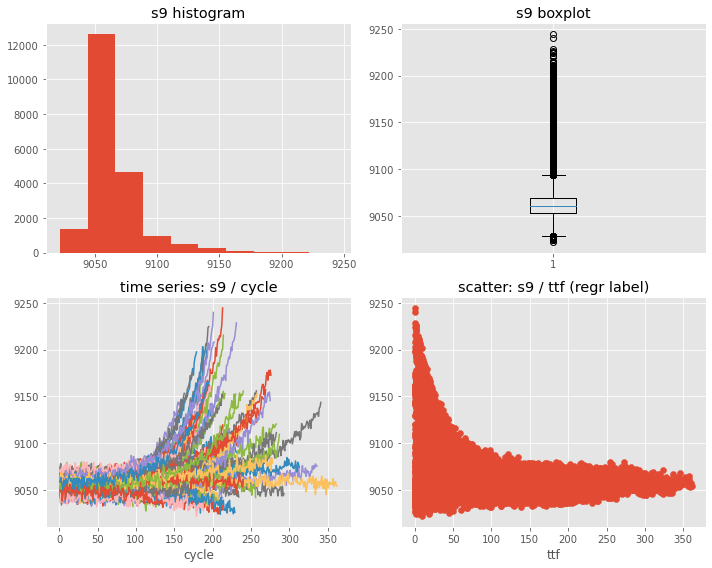

In [58]:
explore_col("s9", 100)

In [59]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_train[['cycle', s]][df_train.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [60]:
plot_time_series('s9')

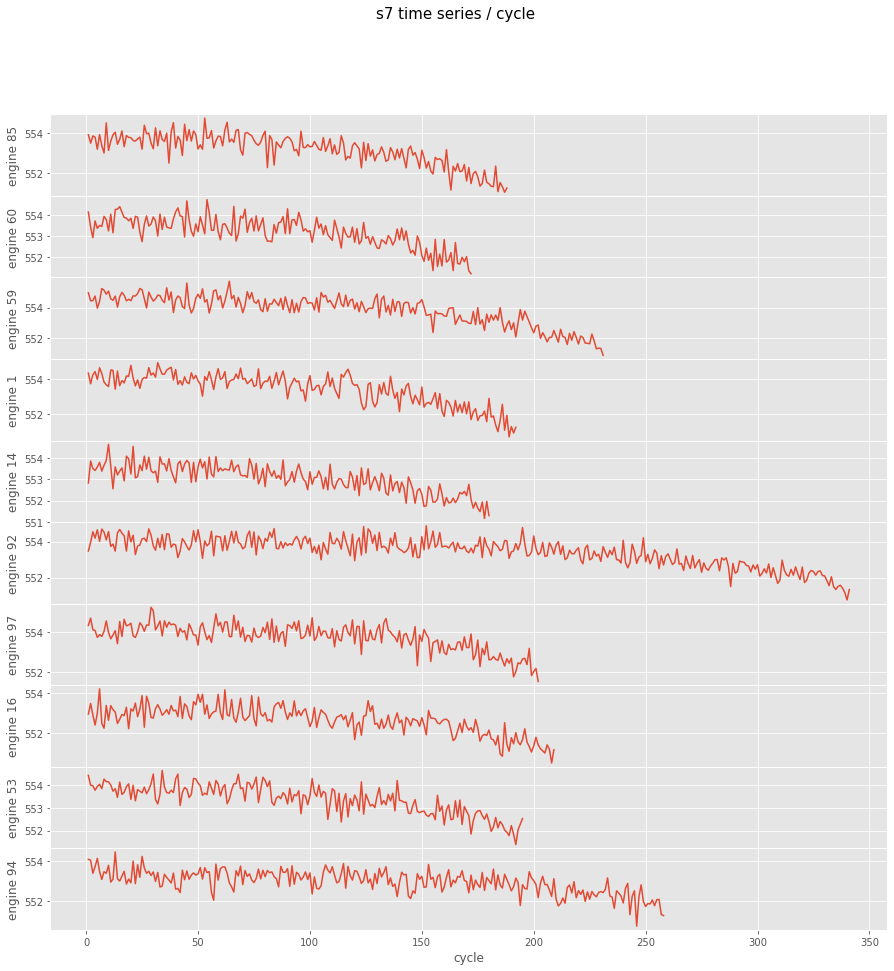

In [61]:
plot_time_series('s7')

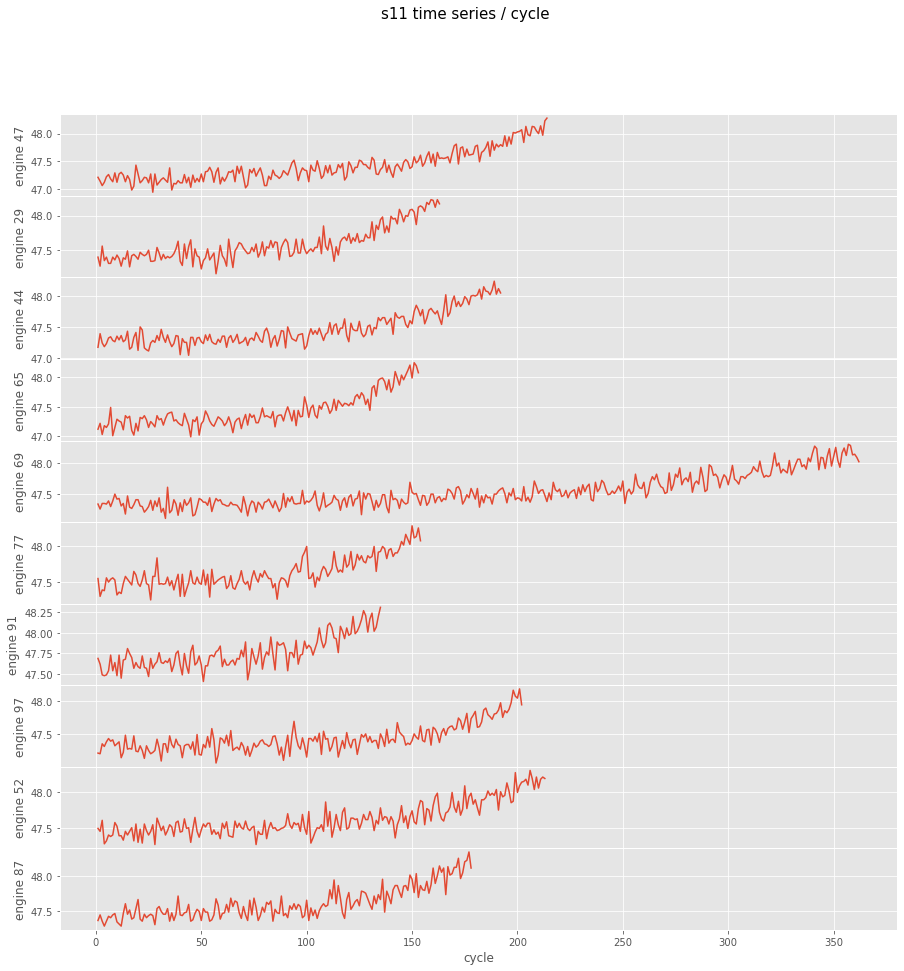

In [62]:
plot_time_series('s11')

###### Let us check some stat on the classifcation labels:

In [64]:
# print stat for binary classification label

print(df_train['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[0]/df_train['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_train['label_bnc'].value_counts()[1]/df_train['label_bnc'].count()))

0    17531
1     3100
Name: label_bnc, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.

In [65]:
# print stat for multiclass classification label

print(df_train['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[0]/df_train['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[1]/df_train['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[2]/df_train['label_mcc'].count()))

0    17531
2     1600
1     1500
Name: label_mcc, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


Also, here we should use AUC ROC for classification evaluation.

### EDA Summary:

-  There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.  
-  Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.
-  Most features exhibit normal distribution which is likely improves models performance. 
-  AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.